# Tier-2 cumulative walltime: Monalisa data

Evaluate the walltime accumulated each year from the beginning of the year up to the current month.

In [24]:
import helpers as h
import pandas as pd

year= 2021
month = 11
values = {}
time = {}
metric = "jobResUsageSum_time_run"

# Get values accumulated from January to current month
#for y in range(2014,year+1):
for y in range(2014,year+1):
    values[y] = h.get_monalisa_values(1, month, y, metric)
    # Another dictionary with summed values for CNAF and Catania
    time[y] = h.merge_monalisa(values[y])

dict_keys(['Bari', 'Catania', 'CNAF', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania', 'Catania-VF', 'CNAF', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])


In [25]:
dataframe = pd.DataFrame.from_dict(time,  orient='index').astype(int)
# Exclude CNAF and Trieste
dataframe = dataframe.drop(['CNAF','TRIESTE'], axis=1)
print (dataframe)

          BARI   CATANIA   LEGNARO    TORINO
2014   5498771   4830029   8788822   4956456
2015  13472732  12180168  12516199   6462020
2016  17464425   8501786  12220369   7337628
2017  16858358   9311528  14169356   7887600
2018  15945912  13206183  12683882   7069903
2019  17075532   9411298  15725318  11222970
2020  14377800   6073853  16347832  11267329
2021  19061173  11731076  20057889  14145283


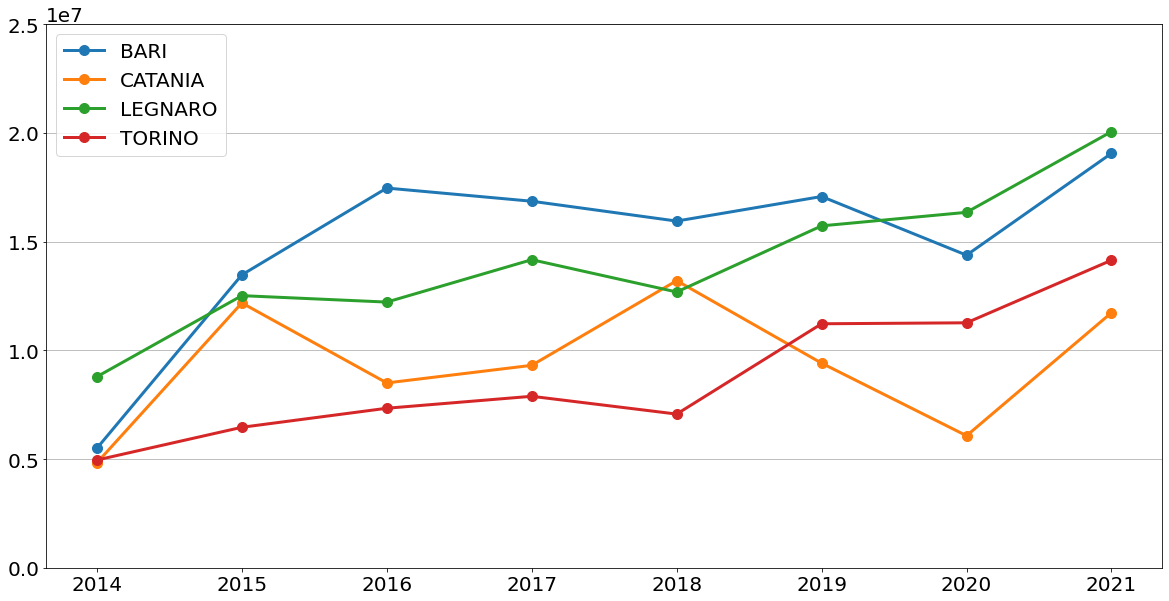

In [26]:
plot = dataframe.plot(style='.-', figsize=(20,10), fontsize = 20, linewidth=3, markersize=20)
plot.set_ylim(0, 25000000)
plot.yaxis.get_offset_text().set_fontsize(20)
plot.grid(True, axis='y')
plot.legend(loc=2, prop={'size':20})

# Walltime difference EGI-Monalisa

Evaluate the walltime accumulated each month since the beginning of the current year.

In [4]:
# We can store results in InfluxDB
influx_url = 'http://localhost:8086/write?db=alice'

In [5]:
# Loop on all months from January to selected month
values_monalisa = {}
values_egi = {}
wallt_monalisa = {}
wallt_egi = {}
wallt_ratio = {}
for m in range(1,month+1):
    # MONALISA
    values_monalisa[m] = h.get_monalisa_values(m, m, year, metric)
    # Another dictionary with summed values for CNAF and Catania
    wallt_monalisa[m] = h.merge_monalisa(values_monalisa[m])
    # EGI
    egi_url="https://accounting-next.egi.eu/egi/ngi/NGI_IT/sumelap/SITE/DATE/"+str(year)+"/"+str(m)+"/"+str(year)+"/"+str(m)+"/custom-alice/onlyinfrajobs/JSON"
    #h.read_write_egi(url_wt, m, year, 'walltime')
    values_egi[m] = h.read_egi(egi_url, m, year, 'walltime')
    #print(values_egi[m])
    wallt_egi[m] = h.remap_egi(values_egi[m])
    wallt_ratio[m] =dict((k, (1.0 - float(wallt_monalisa[m][k]) / float(wallt_egi[m][k])) * 100.) for k in wallt_monalisa[m])
    #print wallt_ratio[m]
    # Write data to InfluxDB
    # (we expect response 204)
    h.write_influx(influx_url, m, year, 'walltime', 'monalisa', wallt_monalisa[m])
    h.write_influx(influx_url, m, year, 'walltime', 'egi', wallt_egi[m])
    h.write_influx(influx_url, m, year, 'walltime', 'ratio', wallt_ratio[m])

dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['

In [20]:
df_ratio_wall = pd.DataFrame.from_dict(wallt_ratio, dtype=float, orient='index')    
print(df_ratio_wall)

         CNAF          BARI   CATANIA   LEGNARO        TORINO       TRIESTE
1    1.238170  6.035597e-01 -2.255712  4.000470  3.011233e+00  2.890645e+00
2    0.238164  4.093486e+00 -1.371261  3.489024  3.189800e+01  3.902755e+00
3    2.436688 -9.872947e-01 -1.311002  2.714664  1.452103e+00  6.263862e+00
4   -2.020427  1.407304e+00  1.173106  1.036794 -3.233489e+00  1.621113e+00
5   -3.214269  3.506550e+00  2.758149  3.041405  2.342525e+00  9.610130e+00
6  -16.427217  4.911559e+00  3.705923  0.424244 -3.303953e+01  3.227531e+00
7   -8.839687  1.452036e+00 -9.506734  2.007940 -4.323860e+07 -1.850400e+07
8  -28.932198  2.626152e+00  3.197354  1.524827 -1.384007e+08 -2.921660e+07
9  -19.000988  3.302362e+00  3.204045  2.741246 -1.506113e+08 -2.916680e+07
10 -10.019957 -1.504461e+02  0.037186  4.906229 -1.511704e+08 -2.904050e+07
11 -18.332606 -1.473520e+08  1.287709  0.806328 -1.584054e+08 -2.531420e+07


In [21]:
df_ratio_wall = df_ratio_wall.drop(['CNAF','TRIESTE'], axis=1)

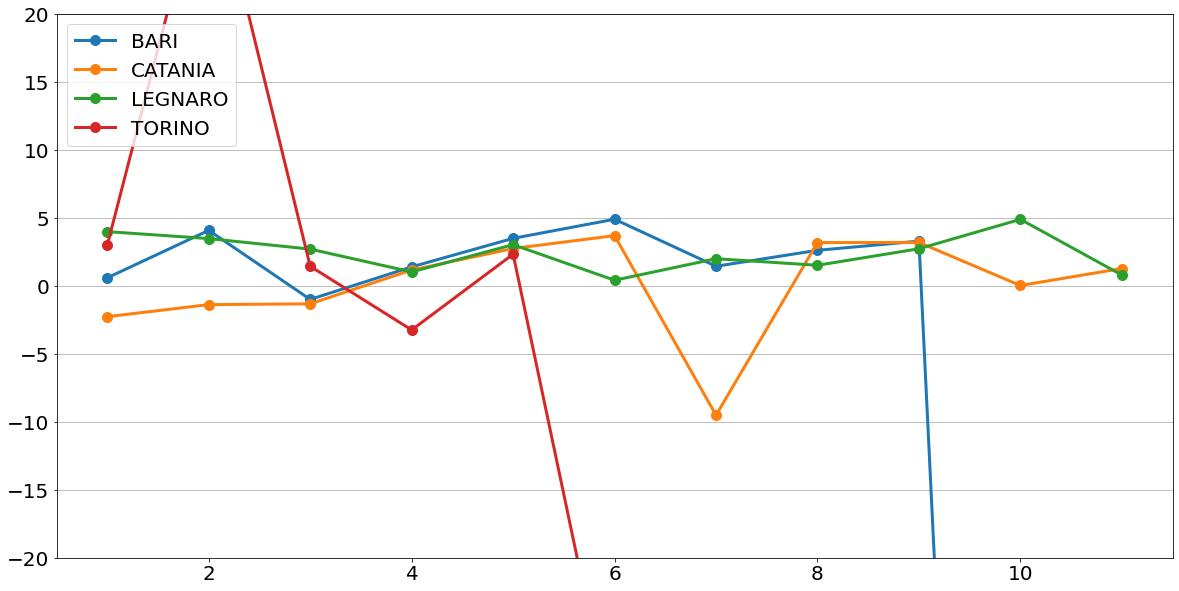

In [23]:
plot_ratio = df_ratio_wall.plot(style='.-', figsize=(20,10), fontsize = 20, linewidth=3, markersize=20)
plot_ratio.yaxis.get_offset_text().set_fontsize(20)
plot_ratio.set_ylim(-20, 20)
plot_ratio.grid(True, axis='y')
plot_ratio.legend(loc=2, prop={'size':20})

In [9]:
# We could drop problematic sites for better ploting
#df_ratio = df_ratio.drop(['TORINO'], axis=1)

In [10]:
#plot_ratio = df_ratio.plot(style='.-', figsize=(20,10), fontsize = 20, linewidth=3, markersize=20)
#plot_ratio.yaxis.get_offset_text().set_fontsize(20)
#plot_ratio.set_ylim(-10, 10)
#plot_ratio.grid(True, axis='y')
#plot_ratio.legend(loc=2, prop={'size':20})

# Tier-2 cumulative cputime: Monalisa data

In [11]:
metric = "jobResUsageSum_time_cpu"

# Get values accumulated from January to current month
#for y in range(2014,year+1):
for y in range(2014,year+1):
    values[y] = h.get_monalisa_values(1, month, y, metric)
    # Another dictionary with summed values for CNAF and Catania
    time[y] = h.merge_monalisa(values[y])

dict_keys(['Bari', 'Catania', 'CNAF', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania', 'Catania-VF', 'CNAF', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])


In [12]:
dataframe = pd.DataFrame.from_dict(time, orient='index').astype(int)
# Exclude CNAF
dataframe = dataframe.drop(['CNAF','TRIESTE'], axis=1)
print (dataframe)

          BARI  CATANIA   LEGNARO   TORINO
2014   4670000  3537200   7037000  3946000
2015  11590000  9141300  10440000  5446000
2016  15290000  6632200   9682000  5900000
2017  13960000  6990000  11720000  6066000
2018  13430000  9496000  10050000  4964000
2019  14370000  7032000  12510000  6086000
2020  11550000  4646000  12560000  7116000
2021  13430000  8810600  14250000  8809000


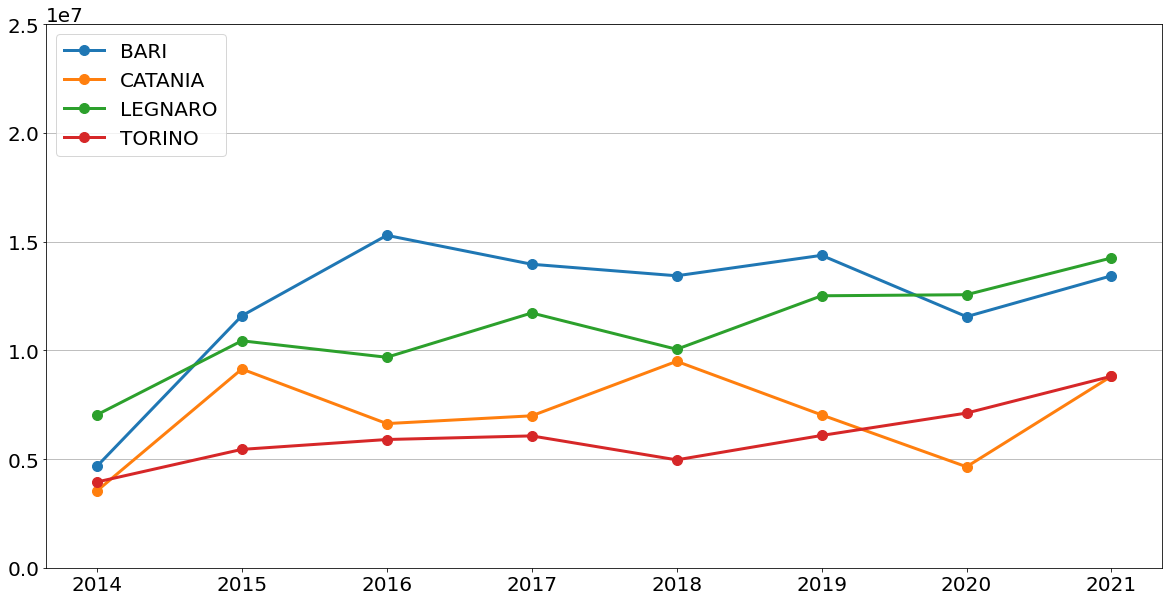

In [13]:
plot = dataframe.plot(style='.-', figsize=(20,10), fontsize = 20, linewidth=3, markersize=20)
plot.set_ylim(0, 25000000)
plot.yaxis.get_offset_text().set_fontsize(20)
plot.grid(True, axis='y')
plot.legend(loc=2, prop={'size':20})

# Cputime difference EGI-Monalisa

In [14]:
# Loop on all months from January to selected month
values_monalisa = {}
values_egi = {}
cput_monalisa = {}
cput_egi = {}
cput_ratio = {}

for m in range(1,month+1):
    # MONALISA
    values_monalisa[m] = h.get_monalisa_values(m, m, year, metric)
    # Another dictionary with summed values for CNAF and Catania
    cput_monalisa[m] = h.merge_monalisa(values_monalisa[m])
    # EGI
    egi_url="https://accounting-next.egi.eu/egi/ngi/NGI_IT/sumcpu/SITE/DATE/"+str(year)+"/"+str(m)+"/"+str(year)+"/"+str(m)+"/custom-alice/onlyinfrajobs/JSON"
    #h.read_write_egi(url_wt, m, year, 'walltime')
    values_egi[m] = h.read_egi(egi_url, m, year, 'cputime')
    cput_egi[m] = h.remap_egi(values_egi[m])
    cput_ratio[m] =dict((k, (1.0 - float(cput_monalisa[m][k]) / float(cput_egi[m][k])) * 100.) for k in cput_monalisa[m])
    # Write data to InfluxDB
    # (we expect response 204)
    h.write_influx(influx_url, m, year, 'cputime', 'monalisa', cput_monalisa[m])
    h.write_influx(influx_url, m, year, 'cputime', 'egi', cput_egi[m])
    h.write_influx(influx_url, m, year, 'cputime', 'ratio', cput_ratio[m])

dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['Bari_HTC', 'Catania-VF', 'CNAF', 'CNAF-DUE', 'Legnaro_HTC', 'Torino', 'Torino-HTC', 'Trieste', 'TriGrid_Catania'])
dict_keys(['

In [15]:
df_ratio_cpu = pd.DataFrame.from_dict(cput_ratio, dtype=float, orient='index')    
print (df_ratio_cpu)

         CNAF          BARI    CATANIA    LEGNARO        TORINO       TRIESTE
1   12.826032  9.443002e+00   1.344025   9.566494  5.850449e+00  3.158121e+00
2   10.660923  1.090952e+01   3.680424   9.798466  3.906355e+00  5.547648e+00
3    9.056053  1.183690e+01   8.769542   8.475115  5.995221e+00  6.681682e+00
4   10.244587  1.005384e+01   7.714321   6.265696 -8.367715e-01  6.861478e+00
5    8.222170  1.135231e+01   9.300655  12.286160  4.462196e+00  1.590171e+01
6   21.883536  1.761659e+01  17.413771  21.196208 -1.733790e+01  2.331137e+01
7   20.663630  1.287759e+01  -2.316013  13.911302 -2.549000e+07 -1.622990e+07
8   14.067786  1.150581e+01   9.012388   8.928603 -7.992990e+07 -2.643990e+07
9   12.873651  1.151344e+01  10.279934  12.028713 -1.021999e+08 -2.547990e+07
10  10.778983 -1.036142e+02   4.364311  14.197402 -8.446990e+07 -2.575990e+07
11  12.484370 -9.913990e+07   8.421945  10.428408 -7.652990e+07 -2.265990e+07


In [16]:
df_ratio_cpu = df_ratio_cpu.drop(['CNAF','TRIESTE'], axis=1)

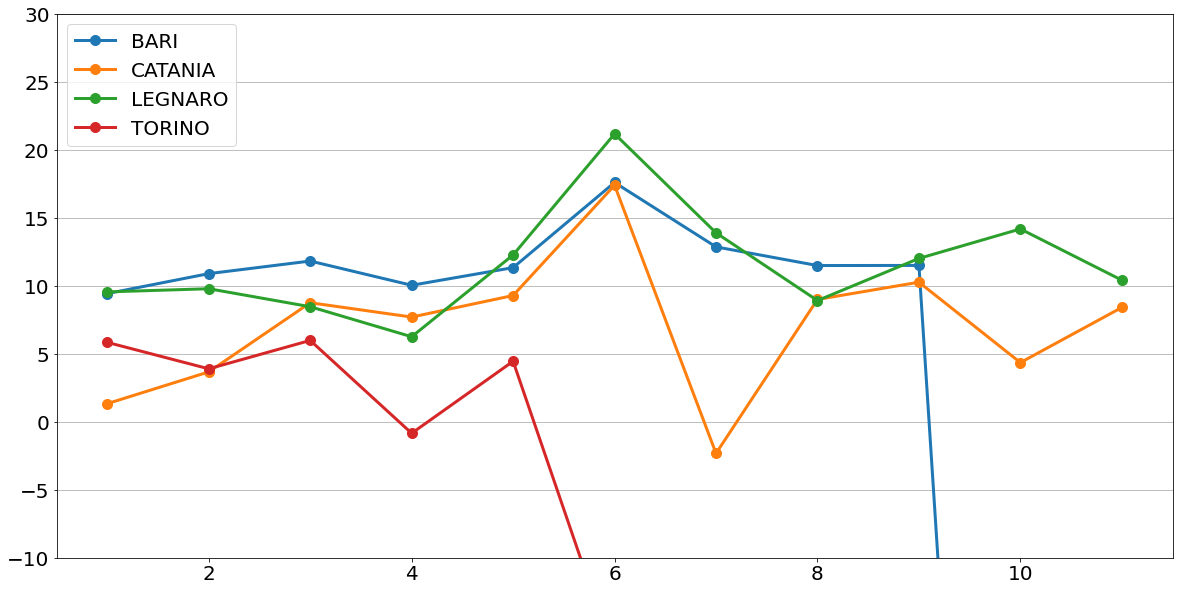

In [17]:
plot_ratio = df_ratio_cpu.plot(style='.-', figsize=(20,10), fontsize = 20, linewidth=3, markersize=20)
plot_ratio.yaxis.get_offset_text().set_fontsize(20)
plot_ratio.set_ylim(-10, 30)
plot_ratio.grid(True, axis='y')
plot_ratio.legend(loc=2, prop={'size':20})

In [18]:
#df_ratio = df_ratio.drop(['TORINO'], axis=1)

In [19]:
#plot_ratio = df_ratio.plot(style='.-', figsize=(20,10), fontsize = 20, linewidth=3, markersize=20)
#plot_ratio.yaxis.get_offset_text().set_fontsize(20)
#plot_ratio.set_ylim(0, 20)
#plot_ratio.grid(True, axis='y')
#plot_ratio.legend(loc=2, prop={'size':20})

## Useful links
- EGI accounting: https://accounting-next.egi.eu/egi/ngi/NGI_IT/sumelap/SITE/DATE/2021/9/2021/11/custom-alice/onlyinfrajobs
- CRIC: https://wlcg-cric.cern.ch/wlcg/accdata/list/
- Dashboard: https://alice-dashboard.cloud.ba.infn.it/d/Y72g7eLmk/alice_it?refresh=15m&orgId=1 (also check for single site dashboards for more details)

# Running jobs

All the relevant plots can be found in the Dashboard:
    https://alice-dashboard.cloud.ba.infn.it/d/ytSrAVPGk/reports?orgId=1

# Pledged resources

**Summary table:** https://docs.google.com/spreadsheets/d/1EvxGqUVDzymosCVHDPGBWkTUC_ZPQVPsE0sFDqFiq5k/edit#gid=467910363

Spreadsheets with installed resources at each site:
- Torino: https://docs.google.com/spreadsheets/d/186Rn656Nv9XfxiqQwf1G-j_FZUK9YNHQEUrI4g_COk4/edit#gid=0
- Catania: https://docs.google.com/spreadsheets/d/17S-H0WldZ3PxPhKJbTmiME_0tBHQEGU6QEc3w9FS0hs/edit#gid=0
- Padova/Legnaro: https://docs.google.com/spreadsheets/d/1h_SFvUUGXW60vjQO0Z6nLopii37XdsKtBud_SpdopNU/edit#gid=0
- Bari: https://docs.google.com/spreadsheets/d/1PTMULTQ4QRPYIq9r4Dfud1-Mb9stnJM_ZJp83SCVfeU/edit#gid=0



# Writing tests

http://alimonitor.cern.ch/status/index.jsp?interval.min=31536000000&plot_series=ALICE%3A%3ACNAF%3A%3ASE&plot_series=ALICE%3A%3ACNAF%3A%3ATAPE&plot_series=ALICE%3A%3ABari%3A%3ASE&plot_series=ALICE%3A%3ACatania%3A%3ASE&plot_series=ALICE%3A%3ALegnaro%3A%3ASE&plot_series=ALICE%3A%3ATorino%3A%3ASE2&plot_series=ALICE%3A%3ATrieste%3A%3ASE

# Reading tests

http://alimonitor.cern.ch/status/index.jsp?interval.min=31536000000&plot_series=ALICE%3A%3ACNAF%3A%3ASE&plot_series=ALICE%3A%3ACNAF%3A%3ATAPE&plot_series=ALICE%3A%3ABari%3A%3ASE&plot_series=ALICE%3A%3ACatania%3A%3ASE&plot_series=ALICE%3A%3ALegnaro%3A%3ASE&plot_series=ALICE%3A%3ATorino%3A%3ASE2&plot_series=ALICE%3A%3ATrieste%3A%3ASE&type=1

# Storage status

The  _Site SE Status_ and _Storage tests_ tables are taken from the national Dashboard:  https://alice-dashboard.cloud.ba.infn.it/d/Y72g7eLmk/alice_it?refresh=15m&orgId=1